### Generates psf files that can be used to create mock JWST images

In [1]:
import webbpsf

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-027 IS BEHIND THE CURRENT ONLINE VERSION PRDOPSSOC-029
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


In [2]:
webbpsf.setup_logging()
webbpsf.setup_logging(filename='my_log.txt')

WebbPSF log messages of level INFO and above will be shown.
WebbPSF log outputs will be directed to the screen.
WebbPSF log messages of level INFO and above will be shown.
WebbPSF log outputs will be directed to the screen.
WebbPSF log outputs will also be saved to file my_log.txt


In [3]:
nc = webbpsf.NIRCam()

In [4]:
psf = nc.calc_psf(nlambda=5, fov_arcsec=2)

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 5 steps


[  poppy] PSF calc using fov_arcsec = 2.000000, oversample = 4, number of wavelengths = 5
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: JWST+NIRCam
[  poppy] JWST Entrance Pupil: Loaded amplitude transmission from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/jwst_pupil_RevW_npix1024.fits.gz
[  poppy] JWST Entrance Pupil: Loaded OPD from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/NIRCam/OPD/OPD_RevW_ote_for_NIRCam_requirements.fits.gz
[  poppy] The supplied pupil OPD is a datacube but no slice was specified. Defaulting to use slice 0.
[  poppy] Added pupil plane: JWST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] Added pupil plane: NIRCamSWA internal WFE at V2V3=(2.01,-8.79)', near ISIM41
[  poppy] Added detector with pixelscale=0.0311 and oversampling=4: NIRCam detector
[  poppy] Calculating PSF with 5 wavelengths
[  poppy]  Propagating wavelength = 1.79996e-06 m
[webbpsf]   Applying OPD foc

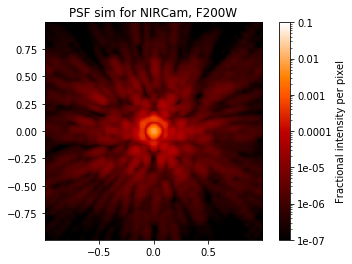

In [5]:
webbpsf.display_psf(psf)
# This is the original, oversampled version

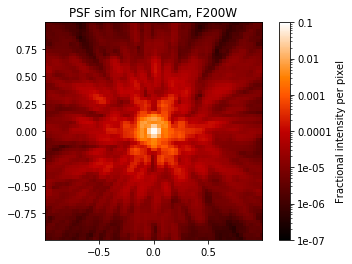

In [6]:
webbpsf.display_psf(psf,ext='DET_SAMP')

In [7]:
import numpy as np
print(np.shape(psf[0].data), np.shape(psf[1].data), np.shape(psf[2].data), np.shape(psf[3].data))

(256, 256) (64, 64) (256, 256) (64, 64)


In [8]:
print(psf)
print(np.shape(psf))
print(psf[1].header)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7fe40a7f2ba8>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fe40ca28be0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fe40ca70f28>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7fe428a263c8>]
(4,)
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   64                                                  NAXIS2  =                   64                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               PLANE1  = 'Wavefront Intensity'                                                 WAVELEN = 1.99258756866904E-06 / Weighted mean wavelength in meters             DIFFLMT =  0.0562231

[webbpsf] NIRCam pixel scale switched to 0.063000 arcsec/pixel for the long wave channel.


[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 21 steps


[  poppy] PSF calc using fov_arcsec = 2.000000, oversample = 4, number of wavelengths = 21
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: JWST+NIRCam
[  poppy] JWST Entrance Pupil: Loaded amplitude transmission from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/jwst_pupil_RevW_npix1024.fits.gz
[  poppy] JWST Entrance Pupil: Loaded OPD from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/NIRCam/OPD/OPD_RevW_ote_for_NIRCam_requirements.fits.gz
[  poppy] The supplied pupil OPD is a datacube but no slice was specified. Defaulting to use slice 0.
[  poppy] Added pupil plane: JWST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] Added pupil plane: NIRCamLWA internal WFE at V2V3=(2.01,-8.79)', near ISIM41
[  poppy] Added detector with pixelscale=0.063 and oversampling=4: NIRCam detector
[  poppy] Calculating PSF with 21 wavelengths
[  poppy]  Propagating wavelength = 3.90341e-06 m
[webbpsf]   Applying OPD fo

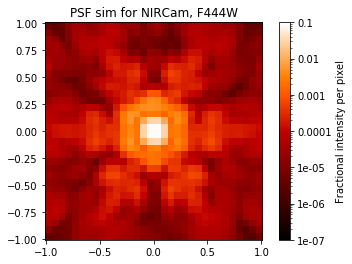

In [9]:
nc.filter='F444W'
psf444 = nc.calc_psf(fov_arcsec=2) # supes verbose
webbpsf.display_psf(psf444, ext='DET_SAMP')

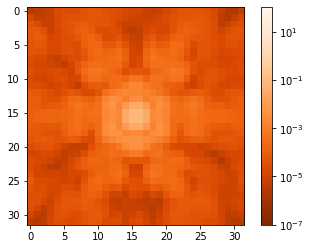

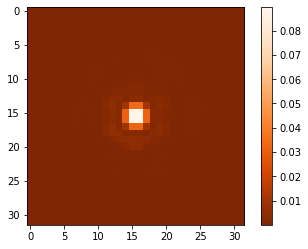

In [14]:
# now just grab extension 1
import matplotlib.pyplot as plt
import matplotlib

plt.clf()
plt.imshow(psf444[1].data, norm=matplotlib.colors.LogNorm(vmax=100, vmin=1e-7),cmap='Oranges_r')
plt.colorbar()
plt.show()

plt.clf()
plt.imshow(psf444[1].data,cmap='Oranges_r')
plt.colorbar()
plt.show()

In [21]:
insts = ['NIRCam','NIRCam','NIRSpec','NIRISS', 'MIRI', 'FGS']
filts = ['F210M', 'F444W', 'F110W', 'F380M', 'F1000W', 'FGS']

psfs = {}
for i, (instname, filt) in enumerate(zip(insts, filts)):
    inst = webbpsf.Instrument(instname)
    inst.filter = filt
    psf = inst.calc_psf(fov_arcsec=5.0)
    psfs[instname+filt] = psf
    print(inst)

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 9 steps


[  poppy] PSF calc using fov_arcsec = 5.000000, oversample = 4, number of wavelengths = 9
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: JWST+NIRCam
[  poppy] JWST Entrance Pupil: Loaded amplitude transmission from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/jwst_pupil_RevW_npix1024.fits.gz
[  poppy] JWST Entrance Pupil: Loaded OPD from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/NIRCam/OPD/OPD_RevW_ote_for_NIRCam_requirements.fits.gz
[  poppy] The supplied pupil OPD is a datacube but no slice was specified. Defaulting to use slice 0.
[  poppy] Added pupil plane: JWST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] Added pupil plane: NIRCamSWA internal WFE at V2V3=(2.01,-8.79)', near ISIM41
[  poppy] Added detector with pixelscale=0.0311 and oversampling=4: NIRCam detector
[  poppy] Calculating PSF with 9 wavelengths
[  poppy]  Propagating wavelength = 2.00163e-06 m
[webbpsf]   Applying OPD foc

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 21 steps


[  poppy] PSF calc using fov_arcsec = 5.000000, oversample = 4, number of wavelengths = 21
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: JWST+NIRCam
[  poppy] JWST Entrance Pupil: Loaded amplitude transmission from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/jwst_pupil_RevW_npix1024.fits.gz
[  poppy] JWST Entrance Pupil: Loaded OPD from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/NIRCam/OPD/OPD_RevW_ote_for_NIRCam_requirements.fits.gz
[  poppy] The supplied pupil OPD is a datacube but no slice was specified. Defaulting to use slice 0.
[  poppy] Added pupil plane: JWST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] Added pupil plane: NIRCamLWA internal WFE at V2V3=(2.01,-8.79)', near ISIM41
[  poppy] Added detector with pixelscale=0.063 and oversampling=4: NIRCam detector
[  poppy] Calculating PSF with 21 wavelengths
[  poppy]  Propagating wavelength = 3.90341e-06 m
[webbpsf]   Applying OPD fo

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 21 steps


<JWST: NIRCam>
[  poppy] PSF calc using fov_arcsec = 5.000000, oversample = 4, number of wavelengths = 21
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: JWST+NIRSpec
[  poppy] JWST Entrance Pupil: Loaded amplitude transmission from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/jwst_pupil_RevW_npix1024.fits.gz
[  poppy] JWST Entrance Pupil: Loaded OPD from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/NIRSpec/OPD/OPD_RevW_ote_for_NIRSpec_requirements.fits.gz
[  poppy] The supplied pupil OPD is a datacube but no slice was specified. Defaulting to use slice 0.
[  poppy] Added pupil plane: JWST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] Added rotation plane: Rotation by 138.40 degrees
[  poppy] Added pupil plane: NIRSpec fore-optics WFE, near ISIM1
[  poppy] Added image plane: MSA all open
[  poppy] Added pupil plane: Pupil stop at grating wheel
[  poppy] Added pupil plane: NIRSpec spectrograph WF

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 9 steps


[  poppy] PSF calc using fov_arcsec = 5.000000, oversample = 4, number of wavelengths = 9
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: JWST+NIRISS
[  poppy] JWST Entrance Pupil: Loaded amplitude transmission from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/jwst_pupil_RevW_npix1024.fits.gz
[  poppy] JWST Entrance Pupil: Loaded OPD from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/NIRISS/OPD/OPD_RevW_ote_for_NIRISS_requirements.fits.gz
[  poppy] The supplied pupil OPD is a datacube but no slice was specified. Defaulting to use slice 0.
[  poppy] Added pupil plane: JWST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] Added pupil plane: NIRISS internal WFE at V2V3=(-4.85,-11.64)', near ISIM14
[webbpsf] Setting Lyot pupil shift to (0.16046417519999998, -0.09310884239999999)
[  poppy] Added pupil plane: CLEARP
[  poppy] Added detector with pixelscale=0.0656 and oversampling=4: NIRISS detector
[  pop

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 9 steps


[  poppy] PSF calc using fov_arcsec = 5.000000, oversample = 4, number of wavelengths = 9
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: JWST+MIRI
[  poppy] JWST Entrance Pupil: Loaded amplitude transmission from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/jwst_pupil_RevW_npix1024.fits.gz
[  poppy] JWST Entrance Pupil: Loaded OPD from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/MIRI/OPD/OPD_RevW_ote_for_MIRI_requirements.fits.gz
[  poppy] The supplied pupil OPD is a datacube but no slice was specified. Defaulting to use slice 0.
[  poppy] Added pupil plane: JWST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] Added rotation plane: Rotation by 4.45 degrees
[  poppy] Added pupil plane: MIRI internal WFE at V2V3=(-7.23,-6.26)', near ISIM13
[  poppy] Added detector with pixelscale=0.111 and oversampling=4: MIRI detector
[  poppy] Calculating PSF with 9 wavelengths
[  poppy]  Propagating wavelength 

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 20 steps


<JWST: MIRI>
[  poppy] PSF calc using fov_arcsec = 5.000000, oversample = 4, number of wavelengths = 20
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: JWST+FGS
[  poppy] JWST Entrance Pupil: Loaded amplitude transmission from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/jwst_pupil_RevW_npix1024.fits.gz
[  poppy] JWST Entrance Pupil: Loaded OPD from /Users/beckynevin/CfA_Code/illustris_python/webbpsf-data/FGS/OPD/OPD_RevW_ote_for_FGS_requirements.fits.gz
[  poppy] The supplied pupil OPD is a datacube but no slice was specified. Defaulting to use slice 0.
[  poppy] Added pupil plane: JWST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] Added pupil plane: Guider1 internal WFE at V2V3=(3.44,-11.63)', near ISIM16
[  poppy] Added detector with pixelscale=0.0691 and oversampling=4: FGS detector
[  poppy] Calculating PSF with 20 wavelengths
[  poppy]  Propagating wavelength = 7.2925e-07 m
[  poppy]  Propagating wave

In [22]:
plt.subplots_adjust(wspace=0.05, bottom=0.05, top=0.9)
for i, (instname, filt) in enumerate(zip(insts, filts)):
    ax = plt.subplot(1,6,1+i)
    webbpsf.display_psf(psfs[instname+filt], colorbar=False, title=instname+" "+filt, vmax=0.03, imagecrop=5)
    if i > 0:
        ax.yaxis.set_visible(False)
plt.tight_layout()
plt.show()
#plt.savefig('fig_instrument_comparison.png', dpi=150)

NameError: name 'plt' is not defined